# KNN Package Visualization Demo

This notebook demonstrates the KNN package with visualizations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import sys
import os

sys.path.append('..')

from knn import KNNClassifier, KNNRegressor, generate_classification_data, generate_regression_data
from knn.utils import train_test_split, accuracy_score, mean_squared_error

plt.style.use('seaborn-v0_8')
np.random.seed(42)

## Classification Visualization

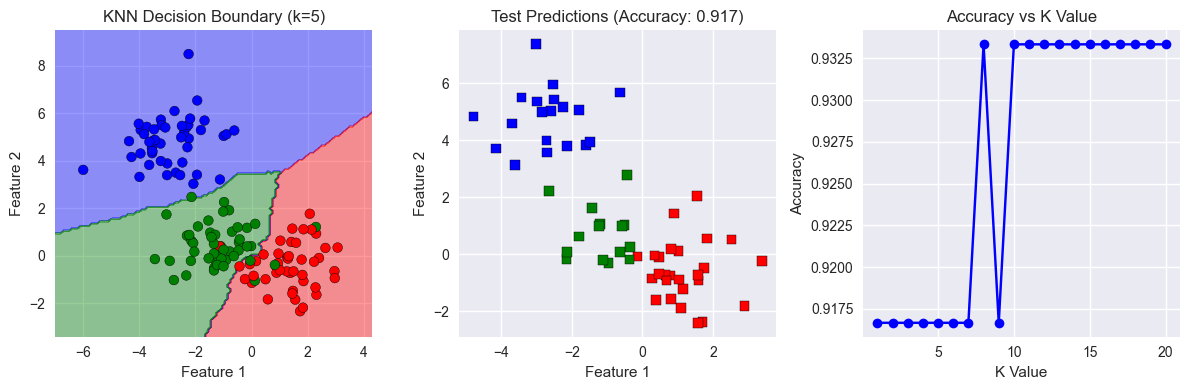

In [2]:
X, y = generate_classification_data(n_samples=200, n_features=2, n_classes=3, 
                                   n_clusters_per_class=1, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


knn = KNNClassifier(k=5)
knn.fit(X_train, y_train)


h = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(mesh_points)
Z = Z.reshape(xx.shape)


plt.figure(figsize=(12, 4))


plt.subplot(1, 3, 1)
colors = ['red', 'blue', 'green']
cmap = ListedColormap(colors)
plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap, edgecolors='black')
plt.title('KNN Decision Boundary (k=5)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 3, 2)
y_pred = knn.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=cmap, edgecolors='black', marker='s')
plt.title(f'Test Predictions (Accuracy: {accuracy_score(y_test, y_pred):.3f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 3, 3)
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn_temp = KNNClassifier(k=k)
    knn_temp.fit(X_train, y_train)
    y_pred_temp = knn_temp.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_temp))

plt.plot(k_values, accuracies, 'bo-')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K Value')
plt.grid(True)

plt.tight_layout()
plt.show()

## Regression Visualization

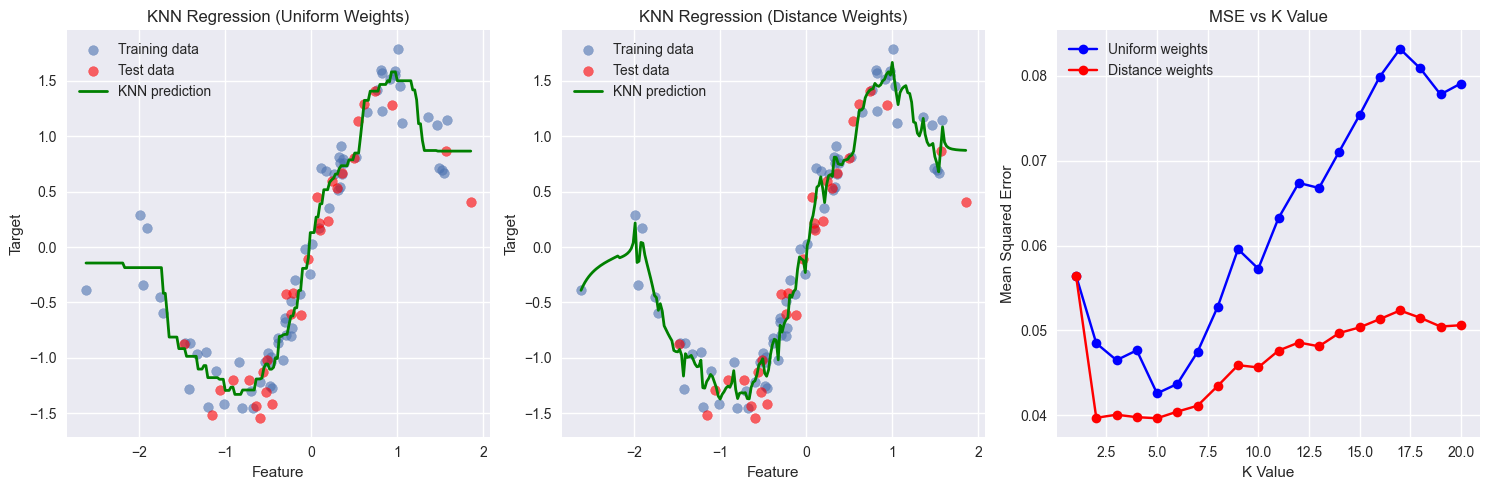

In [3]:
X, y = generate_regression_data(n_samples=100, n_features=1, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_uniform = KNNRegressor(k=5, weights='uniform')
knn_distance = KNNRegressor(k=5, weights='distance')

knn_uniform.fit(X_train, y_train)
knn_distance.fit(X_train, y_train)

X_line = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_pred_uniform = knn_uniform.predict(X_line)
y_pred_distance = knn_distance.predict(X_line)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_train, y_train, alpha=0.6, label='Training data')
plt.scatter(X_test, y_test, alpha=0.6, color='red', label='Test data')
plt.plot(X_line, y_pred_uniform, 'g-', linewidth=2, label='KNN prediction')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('KNN Regression (Uniform Weights)')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X_train, y_train, alpha=0.6, label='Training data')
plt.scatter(X_test, y_test, alpha=0.6, color='red', label='Test data')
plt.plot(X_line, y_pred_distance, 'g-', linewidth=2, label='KNN prediction')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('KNN Regression (Distance Weights)')
plt.legend()

plt.subplot(1, 3, 3)
k_values = range(1, 21)
mse_uniform = []
mse_distance = []

for k in k_values:

    knn_temp = KNNRegressor(k=k, weights='uniform')
    knn_temp.fit(X_train, y_train)
    y_pred_temp = knn_temp.predict(X_test)
    mse_uniform.append(mean_squared_error(y_test, y_pred_temp))
    

    knn_temp = KNNRegressor(k=k, weights='distance')
    knn_temp.fit(X_train, y_train)
    y_pred_temp = knn_temp.predict(X_test)
    mse_distance.append(mean_squared_error(y_test, y_pred_temp))

plt.plot(k_values, mse_uniform, 'bo-', label='Uniform weights')
plt.plot(k_values, mse_distance, 'ro-', label='Distance weights')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs K Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Distance Metrics Comparison

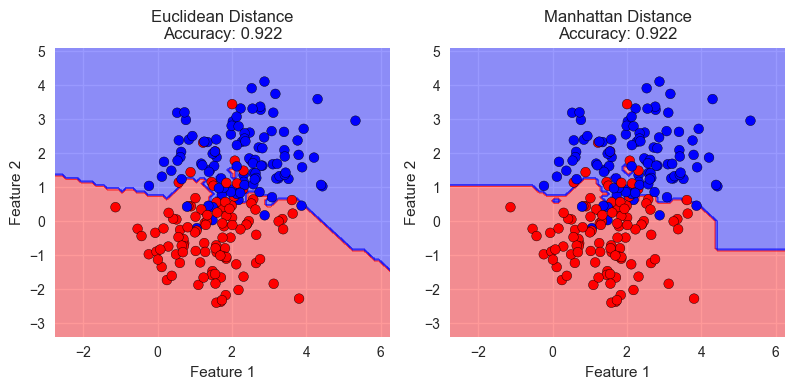

In [ ]:
from knn.utils import manhattan_distance

X, y = generate_classification_data(n_samples=300, n_features=2, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


metrics = {
    'Euclidean': 'euclidean',
    'Manhattan': manhattan_distance
}

plt.figure(figsize=(12, 4))

for i, (name, metric) in enumerate(metrics.items()):
    knn = KNNClassifier(k=5, distance_metric=metric)
    knn.fit(X_train, y_train)
    

    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = knn.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    plt.subplot(1, 3, i+1)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['red', 'blue']))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
               cmap=ListedColormap(['red', 'blue']), edgecolors='black')
    
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    plt.title(f'{name} Distance\nAccuracy: {accuracy:.3f}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')


plt.tight_layout()
plt.show()

## Performance Analysis

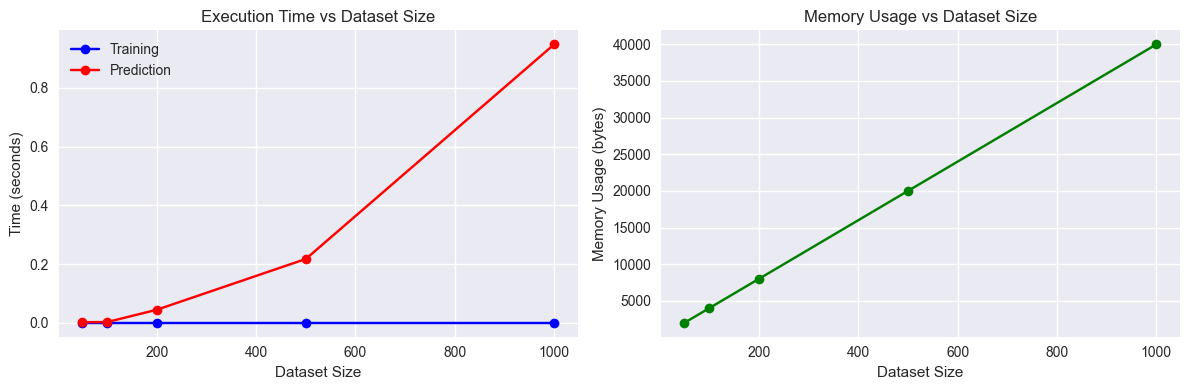

In [5]:
import time

sizes = [50, 100, 200, 500, 1000]
train_times = []
predict_times = []

for size in sizes:
    X, y = generate_classification_data(n_samples=size, n_features=5, n_classes=3, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    knn = KNNClassifier(k=5)
    
    start_time = time.time()
    knn.fit(X_train, y_train)
    train_time = time.time() - start_time
    train_times.append(train_time)
    
    start_time = time.time()
    y_pred = knn.predict(X_test)
    predict_time = time.time() - start_time
    predict_times.append(predict_time)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(sizes, train_times, 'bo-', label='Training')
plt.plot(sizes, predict_times, 'ro-', label='Prediction')
plt.xlabel('Dataset Size')
plt.ylabel('Time (seconds)')
plt.title('Execution Time vs Dataset Size')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
memory_usage = [size * 5 * 8 for size in sizes]  # Approximate bytes
plt.plot(sizes, memory_usage, 'go-')
plt.xlabel('Dataset Size')
plt.ylabel('Memory Usage (bytes)')
plt.title('Memory Usage vs Dataset Size')
plt.grid(True)

plt.tight_layout()
plt.show()